In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import sys
import os
sys.path.append('/content/drive/MyDrive/Colab Notebooks/LSTM')
from np import *
import json
import re
import random

id_to_char = {}
char_to_id = {}
class sequence:
    @staticmethod
    def _update_vocab(txt):
        char_to_id['  '] = 0
        id_to_char[0] = ''
        char = txt
        char = txt
        if char not in char_to_id:
          tmp_id = len(char_to_id)
          char_to_id[char] = tmp_id
          id_to_char[tmp_id] = char


    def load_data(file_name='addition.txt', seed=1984):
        file_path = '/content/drive/MyDrive/Colab Notebooks/LSTM/' + '/' + file_name
        if not os.path.isfile(file_path):
            print('No file: %s' % file_name)
            return None
        text = []

        f = open(file_path, 'r')
        json_data = json.load(f)
        text = json_data

    
        questions, answers = [], []
        for i in range(len(text)):           
            questions.append(text[i])
            text2 = text[i]            
            text2.append('<EOS>')
            text2.pop(0)
            answers.append(text2)
            
    
    # create vocab dict
        max_row_size = 0
        for row in range(0,len(questions)):
          if len(questions[max_row_size]) < len(questions[row]):
            max_row_size = row         
          for col in range(0,len(questions[row])):
            q, a = questions[row][col], answers[row][col]
            sequence._update_vocab(q)
            sequence._update_vocab(a)                 
      

    # create numpy array
        x = np.zeros((len(questions), len(questions[max_row_size])), dtype=np.int)
        t = np.zeros((len(questions), len(answers[max_row_size])), dtype=np.int)

        for i in range(0,len(questions)):
          for j in range(0,len(questions[i])):
            x[i][j] = char_to_id[questions[i][j]]
        
        for i in range(0,len(answers)):
          for j in range(0,len(answers[i])):
            t[i][j] = char_to_id[answers[i][j]]


    # shuffle
        indices = np.arange(len(x))
        if seed is not None:
            np.random.seed(seed)
        np.random.shuffle(indices)
        x = x[indices]
        t = t[indices]

    # 10% for validation set
        split_at = len(x) - len(x) // 10
        #(x_train, x_test) = x[:split_at], x[split_at:]
        (x_train, x_test) = x, x[split_at:]
        #(t_train, t_test) = t[:split_at], t[split_at:]
        (t_train, t_test) = t, t[split_at:]
    #mask test data
        temp_test = []
        x_test = x_test[np.any(x_test ==16, axis=1)]
        t_test = t_test[np.any(t_test ==16, axis=1)]
        for i in range(len(x_test)):
          question = x_test[i]
          end_len = np.argmin(question)
          eval_list =np.where(question ==16)[0]
          p =random.randrange(0,len(eval_list))
          eval_point = eval_list[p]
          for count_x in range(int(eval_point),int(end_len)):
            x_test[i][count_x]=0
        
        return (x_train, t_train), (x_test, t_test)


    def get_vocab():
        return char_to_id, id_to_char

------------------------------------------------------------
                       GPU Mode (cupy)
------------------------------------------------------------



<ipython-input-2-53c9bdc65c5f>:57: DeprecationWarning: `cupy.int` is a deprecated alias for the Python scalar type `int`. Please use the builtin `int` or its corresponding NumPy scalar type `cupy.int_` instead.
  x = np.zeros((len(questions), len(questions[max_row_size])), dtype=np.int)
<ipython-input-2-53c9bdc65c5f>:58: DeprecationWarning: `cupy.int` is a deprecated alias for the Python scalar type `int`. Please use the builtin `int` or its corresponding NumPy scalar type `cupy.int_` instead.
  t = np.zeros((len(questions), len(answers[max_row_size])), dtype=np.int)


| epoch 1 |  iter 1 / 199 | time 20[s] | loss 3.90
| epoch 1 |  iter 21 / 199 | time 60[s] | loss 1.52
| epoch 1 |  iter 41 / 199 | time 101[s] | loss 0.38
| epoch 1 |  iter 61 / 199 | time 141[s] | loss 0.35
| epoch 1 |  iter 81 / 199 | time 181[s] | loss 0.33
| epoch 1 |  iter 101 / 199 | time 223[s] | loss 0.33
| epoch 1 |  iter 121 / 199 | time 263[s] | loss 0.33
| epoch 1 |  iter 141 / 199 | time 304[s] | loss 0.31
| epoch 1 |  iter 161 / 199 | time 344[s] | loss 0.31
| epoch 1 |  iter 181 / 199 | time 385[s] | loss 0.30
Q 動詞非自立可能**助動詞***名詞普通名詞一般*助詞格助詞**形状詞一般**助動詞***名詞普通名詞サ変可能*動詞非自立可能**補助記号読点**接頭辞***名詞普通名詞一般*名詞普通名詞サ変可能*助詞格助詞**動詞一般**名詞普通名詞一般*助詞格助詞**動詞非自立可能**助詞接続助詞**助詞係助詞**名詞普通名詞サ変可能*助詞格助詞**名詞普通名詞サ変可能*動詞非自立可能**形状詞助動詞語幹**
T 補助記号読点**
☒ 名詞普通名詞一般*
---
Q 名詞普通名詞一般*助詞係助詞**補助記号読点**接頭辞***名詞普通名詞一般*補助記号読点**接頭辞***名詞普通名詞一般*
T 補助記号読点**
☒ 助詞格助詞**
---
Q 名詞普通名詞一般*助詞格助詞**名詞普通名詞一般*助詞格助詞**名詞普通名詞助数詞可能*助動詞***動詞非自立可能**助動詞***名詞普通名詞一般*接尾辞名詞的一般*助詞格助詞**名詞普通名詞サ変可能*補助記号読点**動詞一般**名詞普通名詞一般*助詞格助詞**名詞普通名詞サ変可能*補助記号読

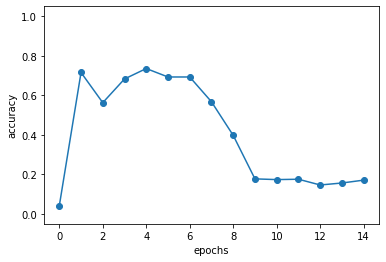

In [ ]:
# coding: utf-8
import sys
sys.path.append('/content/drive/MyDrive/Colab Notebooks/LSTM')
from np import *
from optimizer import Adam
from trainer import Trainer
from util import eval_seq2seq
from attention_seq2seq import AttentionSeq2seq
from seq2seq import Seq2seq
from peeky_seq2seq import PeekySeq2seq
import matplotlib.pyplot as plt

# データの読み込み
(x_train, t_train), (x_test, t_test) = sequence.load_data('converted_POS.json') 
char_to_id, id_to_char = sequence.get_vocab()

# 入力文を反転
#x_train, x_test = x_train[:, ::-1], x_test[:, ::-1]

# ハイパーパラメータの設定
vocab_size = len(char_to_id)# 文字の種類数(EmbedレイヤとAffineレイヤのニューロン数)を取得
wordvec_size = 128 # 単語ベクトルのサイズ(Embedレイヤのニューロン数)を指定
hidden_size = 256 # 隠れ状態のサイズ(LSTMレイヤのニューロン数)を指定
batch_size = 64 # バッチサイズを指定
max_epoch = 15 # エポック当たりの試行回数を指定
max_grad = 5.0 #勾配クリッピング

model = AttentionSeq2seq(vocab_size, wordvec_size, hidden_size)
# model = Seq2seq(vocab_size, wordvec_size, hidden_size)
# model = PeekySeq2seq(vocab_size, wordvec_size, hidden_size)

optimizer = Adam()
trainer = Trainer(model, optimizer)

acc_list = []
for epoch in range(max_epoch):
    trainer.fit(x_train, t_train, max_epoch=1,
                batch_size=batch_size, max_grad=max_grad)

    correct_num = 0
    for i in range(len(x_test)):
        question, correct = x_test[[i]], t_test[[i]]
        verbose = i<10
        correct_num += eval_seq2seq(model, question, correct,
                                    id_to_char, verbose, is_reverse=False)#is_reverseの参照元で語彙ごとに反転するよう変更

    acc = float(correct_num) / len(x_test)
    acc_list.append(acc)
    print('val acc %.3f%%' % (acc * 100))


model.save_params()

# グラフの描画
x = np.arange(len(acc_list))
x = np.asnumpy(x)#cupyからnumpyに
plt.plot(x, acc_list, marker='o')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.ylim(-0.05, 1.05)
plt.show()

In [ ]:
correct = t_test[[5]]
correct = correct.flatten()
print(correct)


[11  1 12  4  1 12  9  5  6  7  8  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]


In [ ]:
import sys
import os
import numpy as np
import json
import re
import random

id_to_char = {}
char_to_id = {}

class sequence:
    @staticmethod
    def _update_vocab(txt):
        char_to_id['　'] = 0
        id_to_char[0] = ''
        char = txt
        if char not in char_to_id:
          tmp_id = len(char_to_id)
          char_to_id[char] = tmp_id
          id_to_char[tmp_id] = char
file_name = 'converted_POS.json'
seed=1984
file_path = '/content/drive/MyDrive/Colab Notebooks/LSTM/' + '/' + file_name
if not os.path.isfile(file_path):
  print('No file: %s' % file_name)
  
text = []

f = open(file_path, 'r')
json_data = json.load(f)
text = json_data
nothing_row=0
    
questions, answers = [], []
for i in range(0,len(text)):
  questions.append(text[i])
  text2 = text[i]            
  text2.append('<EOS>')
  text2.pop(0)
  answers.append(text2)
    
    # create vocab dict
max_row_size = 0
for row in range(0,len(questions)):
  if len(questions[max_row_size]) < len(questions[row]):
    max_row_size = row         
  for col in range(0,len(questions[row])):
    q, a = questions[row][col], answers[row][col]
    sequence._update_vocab(q)
    sequence._update_vocab(a)                      
print(char_to_id)
    # create numpy array
x = numpy.zeros((len(questions), len(questions[max_row_size])), dtype=numpy.int)#1文264単語
t = numpy.zeros((len(questions), len(answers[max_row_size])), dtype=numpy.int)

for i in range(0,len(questions)):
  for j in range(0,len(questions[i])):
    x[i][j] = char_to_id[questions[i][j]]
        
for i in range(0,len(answers)):
  for j in range(0,len(answers[i])):
    t[i][j] = char_to_id[answers[i][j]]

    # shuffle
indices = numpy.arange(len(x))
if seed is not None:
  numpy.random.seed(seed)
numpy.random.shuffle(indices)
x = x[indices]
t = t[indices]
# 10% for validation set
split_at = len(x) - len(x) // 10
(x_train, x_test) = x[:split_at], x[split_at:]
(t_train, t_test) = t[:split_at], t[split_at:]
#mask test data
temp_test = []
x_test = x_test[np.any(x_test ==16, axis=1)]
t_test = t_test[np.any(t_test ==16, axis=1)]
for i in range(len(x_test)):
  question = x_test[i]
  print(question)
  end_len = np.argmin(question)
  eval_list =np.where(question ==16)[0]
  p =random.randrange(0,len(eval_list))
  eval_point = eval_list[p]
  for count_x in range(eval_point,int(end_len)):
    x_test[i][count_x]=0
def get_vocab():
  return char_to_id, id_to_char

{'\u3000': 0, '助詞格助詞**': 1, '名詞普通名詞一般*': 2, '形状詞一般**': 3, '名詞普通名詞サ変可能*': 4, '動詞非自立可能**': 5, '助動詞***': 6, '補助記号句点**': 7, '<EOS>': 8, '動詞一般**': 9, '名詞数詞**': 10, '名詞普通名詞助数詞可能*': 11, '接頭辞***': 12, '助詞副助詞**': 13, '助詞接続助詞**': 14, '助詞係助詞**': 15, '補助記号読点**': 16, '副詞***': 17, '名詞固有名詞地名一般': 18, '名詞普通名詞副詞可能*': 19, '接尾辞名詞的一般*': 20, '接続詞***': 21, '名詞固有名詞人名姓': 22, '名詞固有名詞人名名': 23, '名詞固有名詞一般*': 24, '代名詞***': 25, '形状詞助動詞語幹**': 26, '補助記号括弧開**': 27, '補助記号括弧閉**': 28, '助詞準体助詞**': 29, '名詞固有名詞地名国': 30, '形容詞一般**': 31, '形容詞非自立可能**': 32, '接尾辞形状詞的**': 33, '接尾辞名詞的副詞可能*': 34, '名詞普通名詞形状詞可能*': 35, '補助記号一般**': 36, '連体詞***': 37, '接尾辞名詞的サ変可能*': 38, '名詞普通名詞サ変形状詞可能*': 39, '助詞終助詞**': 40, '接尾辞名詞的助数詞*': 41, '接尾辞動詞的**': 42, '名詞固有名詞人名一般': 43, '接尾辞形容詞的**': 44, '感動詞一般**': 45, '感動詞フィラー**': 46, '記号一般**': 47, '名詞助動詞語幹**': 48, '形状詞タリ**': 49}


<ipython-input-19-41a17c00e604>:53: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  x = numpy.zeros((len(questions), len(questions[max_row_size])), dtype=numpy.int)#1文264単語
<ipython-input-19-41a17c00e604>:54: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for

ストリーミング出力は最後の 5000 行に切り捨てられました。
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
[15 16 24 10 10  2  1 10 11  1  2  1  5 14 16  2  2  4 20  2  1  4  5 16
  2  1  4  1  2  4  1  9  6  2  1  9 14  5  6  7  8  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0

In [ ]:
question = x_test[4]
print(question)
end_len = np.argmin(question)
eval_list =np.where(question ==16)[0]
p=random.randrange(0,len(eval_list))
eval_point = eval_list[p] +1
print(eval_point)
for count_x in range(eval_point,int(end_len)):
  x_test[4][count_x]=0

[ 9  6 14 16 10 10 10 10 11  1 18  2  1 15 16  2 35  2 13 16  2  2  1  4
  1  9  6  6 14 16  2  4  1 19  1  2  4  1  2  1  9 14  5 16 12 10 10 11
  1 15  2  4 13 19  2  1  2  2  1  4  1 15  9  6  6  7  8  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
4


In [ ]:
sample_id = x_test[3][2]
print(sample_id)
x = np.array(sample_id).reshape(1, 1)
N, T = x.shape
print(N)
print(T)

8
1
1


In [ ]:

for i in range(len(x_test)):
  question = x_test[i]
  correct = t_test[i]
  correct = correct.flatten()
    # 頭の区切り文字
  end_len = numpy.argmin(question)
  if question.all() !=0:
      end_len = len(question)
  if end_len <=1:
      eval_point =0
  else:
      eval_point = random.randrange(0,(end_len-1))
  start_id = question[eval_point]
  for count_x in range(eval_point,int(end_len)):
      question[count_x]=0
  correct = correct[eval_point]

In [ ]:
question = x_test[9]
correct = t_test[9]
correct = correct.flatten()
    # 頭の区切り文字
end_len = np.argmin(question)
if question.all():
    end_len = len(question)
print(end_len,question)
if end_len <=1:
    eval_point =0
else:
    eval_point = random.randrange(0,(end_len-1))
print(eval_point)
start_id = question[eval_point]
for count_x in range(eval_point,int(end_len)):
    question[count_x]=0
correct = correct[eval_point]
print(question,start_id)
x = np.array(sample_id).reshape((1, 1))
N, T = x.shape
print(N)
print(T)

49 [ 2  2  2 10 10 10 10  6 15 17 16 18  1  4  1 16  2  4 34  1  2  1 10 10
 11  1  2 10 36 10  6  5 16 35  2  1  4  1  5  2 15  4  5  6 14  5  6  7
  8  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
3

In [ ]:
k = x_train[:, ::-1]
print(k)

[[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  9
   8  7  7  6  2  3  7 11  2 15  5  2  3  3  3 18  5  2  3  5  4  3  2 21
   3  3 18  3  3 18  5  5  2 21  5  3  2  1  6  5  2 21  3 18 22]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0

In [ ]:
o = x_train[[2]]
print(o)

[[ 2 18  2  1  2  1  9  4  1 15 16 22  2  1  2 11  1  2  4  2  4  1  9  2
  20  1  2  1  2  4  1  9 14  2  2  1  4  1  9  6  2  1  9 16  2 11 20 15
  16  9  6  2 15  2  1  5 14  5  2  1  4  5  6  2  6  5 16  2  2  1  9  6
  14  5  6 13  1  4  1  9  6  4  1  5  6  6  7  8  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]]


In [ ]:
p = o[::-1]
print(p)

[[ 2 18  2  1  2  1  9  4  1 15 16 22  2  1  2 11  1  2  4  2  4  1  9  2
  20  1  2  1  2  4  1  9 14  2  2  1  4  1  9  6  2  1  9 16  2 11 20 15
  16  9  6  2 15  2  1  5 14  5  2  1  4  5  6  2  6  5 16  2  2  1  9  6
  14  5  6 13  1  4  1  9  6  4  1  5  6  6  7  8  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]]


検証データと問題データが大幅に違うとエラーが起きる？
> →両方のデータを作る時点で次単語のみ予測するよう直す？



<ipython-input-11-532b25b73fb9>:57: DeprecationWarning: `cupy.int` is a deprecated alias for the Python scalar type `int`. Please use the builtin `int` or its corresponding NumPy scalar type `cupy.int_` instead.
  x = np.zeros((len(questions), len(questions[max_row_size])), dtype=np.int)
<ipython-input-11-532b25b73fb9>:58: DeprecationWarning: `cupy.int` is a deprecated alias for the Python scalar type `int`. Please use the builtin `int` or its corresponding NumPy scalar type `cupy.int_` instead.
  t = np.zeros((len(questions), len(answers[max_row_size])), dtype=np.int)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 21161 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 35422 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: Run

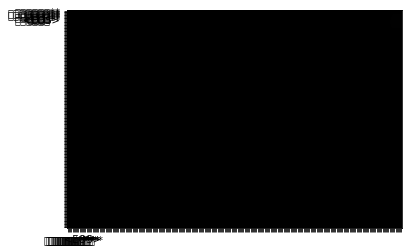

/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 20418 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 38750 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 33258 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 31435 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 21487 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 33021 missing from current font.
  font.set_

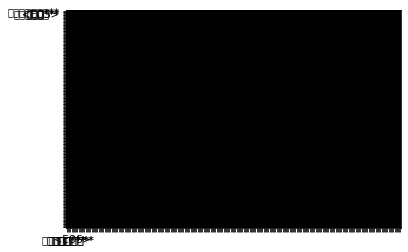

/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 20195 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 12469 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 22793 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 20195 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 12469 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 22793 missing from current font.
  font.set_text

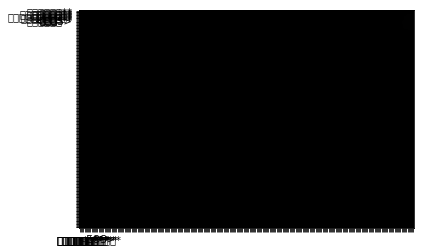

/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 25968 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 25968 missing from current font.
  font.set_text(s, 0, flags=flags)


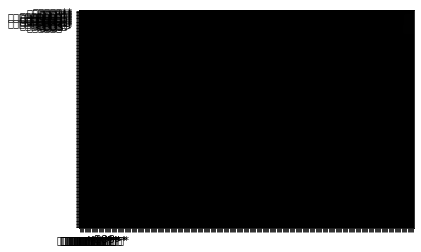

/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 24418 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 29366 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 23614 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 30340 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 22266 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 26377 missing from current font.
  font.set_

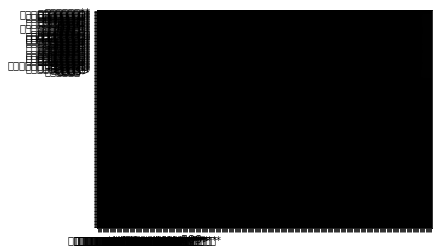

In [ ]:
# coding: utf-8
import sys
sys.path.append('/content/drive/MyDrive/Colab Notebooks/LSTM')
import cupy as np
import numpy
import matplotlib.pyplot as plt
from attention_seq2seq import AttentionSeq2seq


(x_train, t_train), (x_test, t_test) = sequence.load_data('converted_POS.json')
char_to_id, id_to_char = sequence.get_vocab()

# Reverse input
x_train, x_test = x_train[:, ::-1], x_test[:, ::-1]

vocab_size = len(char_to_id)
wordvec_size = 46
hidden_size = 264

model = AttentionSeq2seq(vocab_size, wordvec_size, hidden_size)
model.load_params()

_idx = 0
def visualize(attention_map, row_labels, column_labels):
    fig, ax = plt.subplots()
    attention_map = np.asnumpy(attention_map)
    ax.pcolor(attention_map, cmap=plt.cm.Greys_r, vmin=0.0, vmax=1.0)

    ax.patch.set_facecolor('black')
    ax.set_yticks(numpy.arange(attention_map.shape[0])+0.5, minor=False)
    ax.set_xticks(numpy.arange(attention_map.shape[1])+0.5, minor=False)
    ax.invert_yaxis()
    ax.set_xticklabels(row_labels, minor=False)
    ax.set_yticklabels(column_labels, minor=False)

    global _idx
    _idx += 1
    plt.show()


np.random.seed(1984)
for _ in range(5):
    idx = [np.random.randint(0, len(x_test))]
    x = x_test[idx]
    t = t_test[idx]

    model.forward(x, t)
    d = model.decoder.attention.attention_weights
    d = np.array(d)
    attention_map = d.reshape(d.shape[0], d.shape[2])

    # reverse for print
    attention_map = attention_map[:,::-1]
    x = x[:,::-1]
    x = x[0].flatten()
    x = x.tolist()
    t = t[0].flatten()
    t = t.tolist()
    row_labels = [id_to_char[i] for i in x]
    column_labels = [id_to_char[i] for i in t]
    column_labels = column_labels[1:]

    visualize(attention_map, row_labels, column_labels)